<a href="https://colab.research.google.com/github/gabriela-148/AI/blob/main/HW7/Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gabriella Huegel**

**Assignment 7 Report**

**CSC362**


**4/23/24**
# **Problem 1**

For this assignment, I referred to the Iris_MLP_Classifier Juptyer notebook and my notes from lecture.

The very first step I took was to install and load the necessary libraries.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from PIL import Image
from google.colab import drive
import matplotlib.pyplot as plt
import os

Next, I loaded the dataset from my Google Drive that I downloaded from the AI_ML_Datasets folder.

I had to mount my Google Drive and connect to the correct folder.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls drive/MyDrive/'Colab Notebooks'


Assignment2.ipynb	    Assignment6.ipynb	      Project4_InitalThoughts.ipynb
Assignment3.ipynb	    Assignment7.ipynb	      Project6_Problem1.ipynb
Assignment3_Problem1.ipynb  P5_Problem1_Python.ipynb  Project6_Problem2.ipynb
Assignment3_Problem2.ipynb  Problem1.ipynb	      Untitled0.ipynb
Assignment3_Problem3.ipynb  Problem1_Python.ipynb     Untitled1.ipynb
Assignment4_Report.ipynb    Problem1_R.ipynb	      Untitled2.ipynb
Assignment5_Problem1.ipynb  Problem2_Python.ipynb     Untitled3.ipynb
Assignment5_Problem2.ipynb  Problem2_R.ipynb


In [4]:
!cp   drive/'My Drive'/'Spring 2024'/'CSC362'/'Assignment7_Files'/'AI_ML_Datasets'/nasa_asteroid.csv  /content

After mounting my drive, I could give the filepath to the correct CSV file for NASA asteroids.

In [5]:
# Load the dataset
import pandas as pd
data = pd.read_csv("drive/My Drive/Spring 2024/CSC362/Assignment7_Files/AI_ML_Datasets/nasa_asteroid.csv")

Next, I went through the dataframe and dropped any unnecessary columns that could skew the data analysis.


When going through the dataset, I determined that the columns to remove Orbit Determination Date, Name, Equinox, Close Approach Date, Eccentricity, Orbiting Body, Semi Major Axis. I removed all of these because they were not numeric values in the set. And, when classifying asteroids as either hazardous or non harzardous, these parameters do not contribute to its danger.



In order to continue my analysis, I can only use numeric values in the MLP classifier.

After removing the columns, I scaled the new dataset so that the numbers are easier to analyze within the classifier.

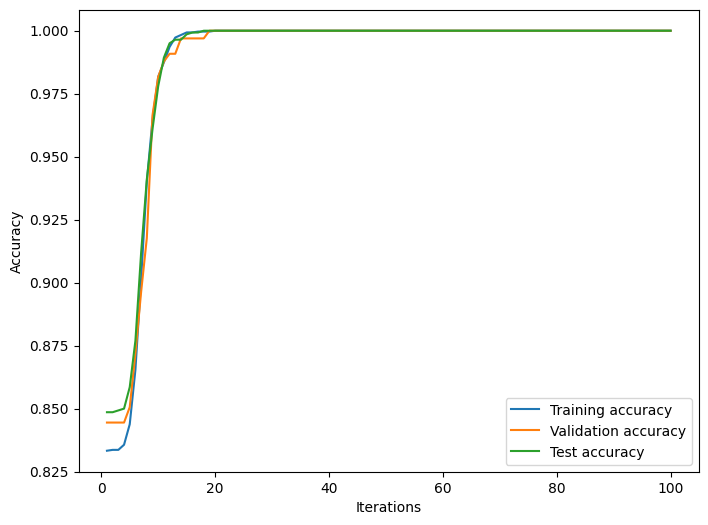

In [7]:
#@title Scaler & Plotting Accuracies
from sklearn.preprocessing import LabelEncoder
 # Scale the numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(['Orbit Determination Date', 'Name', 'Equinox', 'Close Approach Date', 'Eccentricity', 'Orbiting Body', 'Semi Major Axis'], axis = 1))

X = data_scaled
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Hazardous'])


# Split the dataset into training, validation, and testing sets -- randomly shuffle the sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# Split the training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Create an MLPClassifier without early stopping
#mlp = MLPClassifier(hidden_layer_sizes=(40, 50), max_iter=100)
mlp = MLPClassifier(hidden_layer_sizes=(20, 15), max_iter=1000)
#mlp = MLPClassifier(hidden_layer_sizes=(40, 50), max_iter=100)


# Initialize lists to store training, validation, and test accuracies
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Train the classifier and calculate accuracies at each iteration
# partial_fit() allows for incremental learning without retraining it from scratch
for i in range(100):
    mlp.partial_fit(X_train, y_train, classes=np.unique(y_train))
    train_accuracies.append(mlp.score(X_train, y_train))
    val_accuracies.append(mlp.score(X_val, y_val))
    test_accuracies.append(mlp.score(X_test, y_test))

# Plot the training, validation, and test accuracies
plt.figure(figsize=(8, 6))
plt.plot(range(1, 101), train_accuracies, label='Training accuracy')
plt.plot(range(1, 101), val_accuracies, label='Validation accuracy')
plt.plot(range(1, 101), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


I split the scaled dataset into a training and testing set then ran them through the classifier.

In the training and testing models, the accuracies reached close to 100% according to the plot graph above. The accuracies are important when using the MLP classifier because it shows you how the models are performing with correctly classifying the data you are presenting to them.

Next, I displayed the loss curve for the MLP classifier. The loss curve is important for the analysis because it shows us how the model's performance is improving over time based on the predicted and actual output of the model.

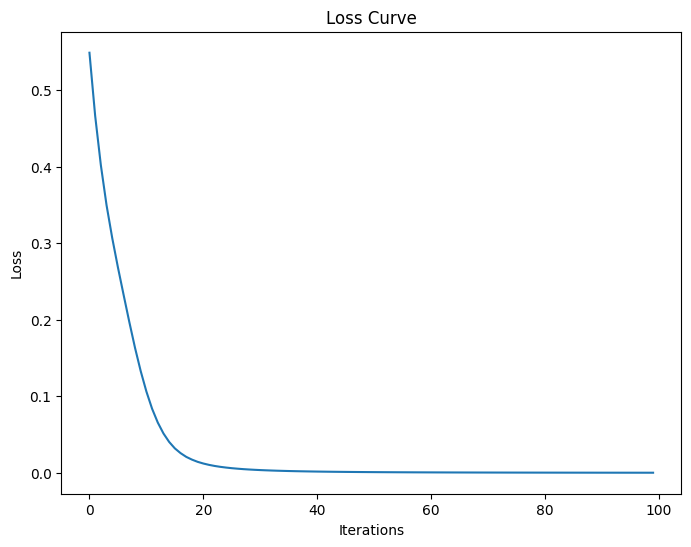

In [8]:
#@title Loss Curve
# Plot the loss curve
plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

Based on this loss curve graph, the loss curve was greater in the earlier iterations of the model, however, as the model continued through its iterations, the loss curve became nearly non-existent.

Next, I calculated the overall training and test model accuraries. These values helps determine how accurate the models were in correctly classifying the data.

In [10]:
#@title Calculation the overall training and test accuracies
train_accuracy = mlp.score(X_train, y_train)
test_accuracy = mlp.score(X_test, y_test)

# Print the overall training and test accuracies
print(f"Overall Training Accuracy: {train_accuracy}")
print(f"Overall Test Accuracy: {test_accuracy}")

Overall Training Accuracy: 1.0
Overall Test Accuracy: 1.0


In this case, the training and test accuracy were both 100%. I am not happy with these numbers because 100% accuracy is not ideal because the model does not immediately predict the correct classification when the model frist begins its classfication.

The accuracy should be in the mid 90s instead since, in this case, we can see that the model was not 100% accurate throughout the iterations.

Next, I calculated the confusion matrix which tells us exactly how many data points were correctly classfied and how many were not.

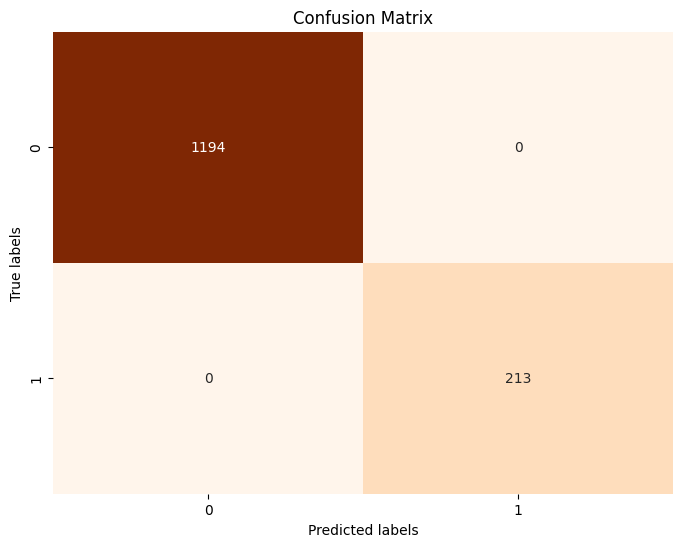

In [12]:
#@title Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predicted labels for the test set
y_pred = mlp.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In this case, the model did correctly identify all asteroids as either harazardous or non hazardous.

#Changing Parameters


Next I changed the hyper parameters to have less hidden layers and a slightly smaller amount of nuerons to see if this affects the accuracy of the model in a negative way. Since the model is already at 100% accuracy, changing the parameters in this manner should decrease its accuracy.

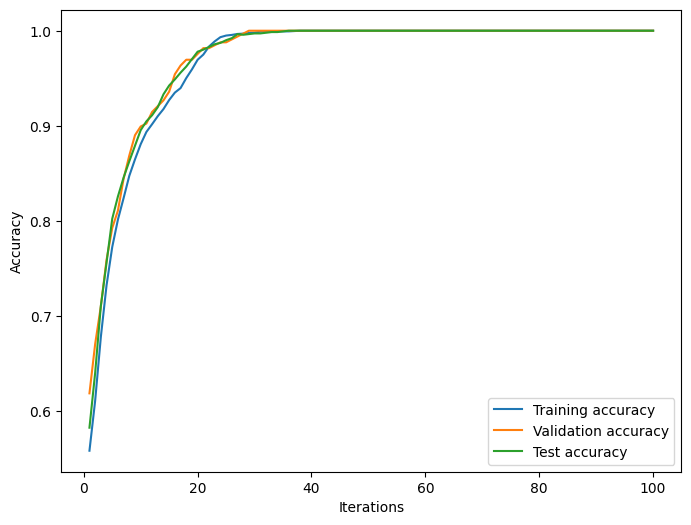

In [25]:
#@title Scaler & Plotting Accuracies
from sklearn.preprocessing import LabelEncoder
 # Scale the numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(['Orbit Determination Date', 'Name', 'Equinox', 'Close Approach Date', 'Eccentricity', 'Orbiting Body', 'Semi Major Axis'], axis = 1))

X2 = data_scaled
label_encoder = LabelEncoder()
y2 = label_encoder.fit_transform(data['Hazardous'])


# Split the dataset into training, validation, and testing sets -- randomly shuffle the sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42, shuffle=True)

# Split the training into training and validation sets
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train2, y_train2, test_size=0.1, random_state=42)

# Create an MLPClassifier without early stopping
#mlp = MLPClassifier(hidden_layer_sizes=(40, 50), max_iter=100)
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=1000)
#mlp = MLPClassifier(hidden_layer_sizes=(40, 50), max_iter=100)


# Initialize lists to store training, validation, and test accuracies
train_accuracies2 = []
val_accuracies2 = []
test_accuracies2 = []

# Train the classifier and calculate accuracies at each iteration
# partial_fit() allows for incremental learning without retraining it from scratch
for i in range(100):
    mlp.partial_fit(X_train2, y_train2, classes=np.unique(y_train2))
    train_accuracies2.append(mlp.score(X_train2, y_train2))
    val_accuracies2.append(mlp.score(X_val2, y_val2))
    test_accuracies2.append(mlp.score(X_test2, y_test2))

# Plot the training, validation, and test accuracies
plt.figure(figsize=(8, 6))
plt.plot(range(1, 101), train_accuracies2, label='Training accuracy')
plt.plot(range(1, 101), val_accuracies2, label='Validation accuracy')
plt.plot(range(1, 101), test_accuracies2, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


I changed the parameters to 5 hidden layers with 5 neurons. In this case, it took more iterations in order for the model to reach 100% accuracy.

In [24]:
#@title Calculation the overall training and test accuracies
train_accuracy2 = mlp.score(X_train2, y_train2)
test_accuracy2 = mlp.score(X_test2, y_test2)

# Print the overall training and test accuracies
print(f"Overall Training Accuracy: {train_accuracy2}")
print(f"Overall Test Accuracy: {test_accuracy2}")

Overall Training Accuracy: 1.0
Overall Test Accuracy: 1.0


After changing the parameters, the model still correctly classified the asteroids as either hazardous or non hazardous, but it took longer for the model to have this accuracy.